Hypothesis 1: Does Genre Affect Revenue?

• Business Question: Do Action movies earn significantly more revenue than Drama movies?  
• Null Hypothesis (H₀): There is no difference in mean revenue between Action and Drama movies.  
• Alternative Hypothesis (H₁): Action movies have a higher mean revenue than Drama movies.  
• Test Type: Independent two-sample t-test (Action vs Drama)  
• Column(s) used: genres, domestic_gross

In [6]:
import os
os.listdir('../zippedData')

['bom.movie_gross.csv.gz',
 'im.db.zip',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [7]:
import pandas as pd

movies_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')


In [10]:
print(movies_df.columns)
print(gross_df.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [11]:
MoviesAndGross_df = pd.merge(
    movies_df,
    gross_df,
    left_on='movie',
    right_on='title',
    how='inner'
)

In [12]:
MoviesAndGross_df.shape
MoviesAndGross_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Spectre,Sony,200100000.0,680600000,2015


In [20]:
info_df.columns

Index(['id', 'synopsis', 'rating', 'genres', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [21]:
info_df[['id', 'genres']].head()

,id,genres
0,1,Action and Adventure|Classics|Drama
1,3,Drama|Science Fiction and Fantasy
2,5,Drama|Musical and Performing Arts
3,6,Drama|Mystery and Suspense
4,7,Drama|Romance


In [22]:
final_df = pd.merge(MoviesAndGross_df, info_df[['id', 'genres']], on='id', how='inner')
final_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,Drama|Romance
1,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Spectre,Sony,200100000.0,680600000,2015,Comedy
2,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",The Lone Ranger,BV,89300000.0,171200000,2013,Drama
3,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",John Carter,BV,73100000.0,211100000,2012,Drama
4,15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240",Tangled,BV,200800000.0,391000000,2010,Action and Adventure|Mystery and Suspense|Scie...


In [23]:
action_movies = final_df[final_df['genres'].str.contains('Action', na=False)]
drama_movies = final_df[final_df['genres'].str.contains('Drama', na=False)]

In [24]:
action_movies.head()
drama_movies.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,Drama|Romance
2,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",The Lone Ranger,BV,89300000.0,171200000,2013,Drama
3,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",John Carter,BV,73100000.0,211100000,2012,Drama
9,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,"$250,000,000","$255,119,788","$945,577,621",The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014,Comedy|Drama|Mystery and Suspense
10,23,"Apr 14, 2017",The Fate of the Furious,"$250,000,000","$225,764,765","$1,234,846,267",The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,Drama


In [26]:
action_revenue = action_movies['worldwide_gross'].str.replace(r'[\$,]', '', regex=True).astype(float)
drama_revenue = drama_movies['worldwide_gross'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind

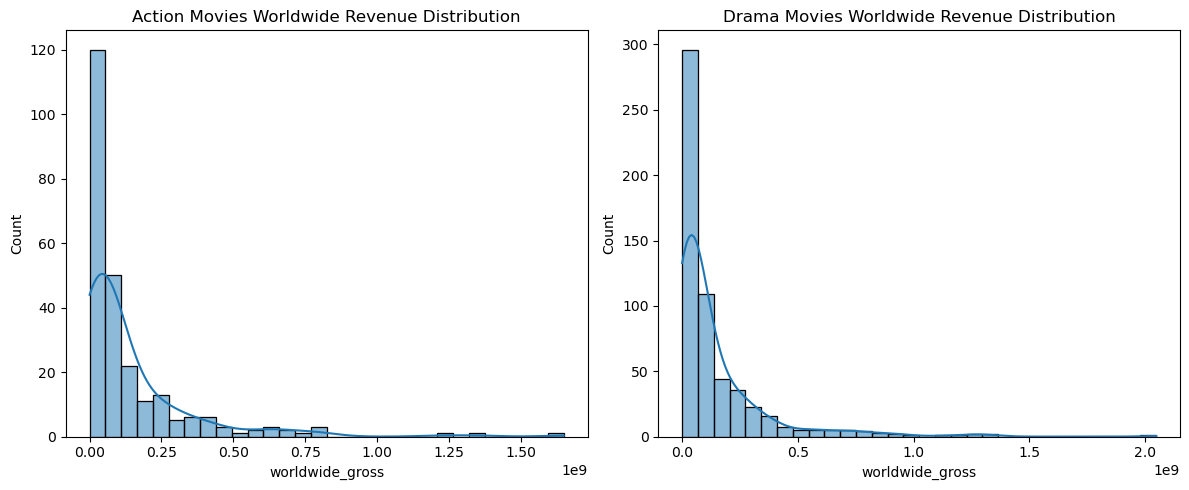

In [28]:
plt.figure(figsize=(12, 5))

# Action movies distribution
plt.subplot(1, 2, 1)
sns.histplot(action_revenue, kde=True, bins=30)
plt.title('Action Movies Worldwide Revenue Distribution')

# Drama movies distribution
plt.subplot(1, 2, 2)
sns.histplot(drama_revenue, kde=True, bins=30)
plt.title('Drama Movies Worldwide Revenue Distribution')

plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import shapiro

print("Shapiro Test – Action Movies:", shapiro(action_revenue))
print("Shapiro Test – Drama Movies:", shapiro(drama_revenue))

Shapiro Test – Action Movies: ShapiroResult(statistic=0.6192002626846316, pvalue=3.000807291520271e-23)
Shapiro Test – Drama Movies: ShapiroResult(statistic=0.6136821110797853, pvalue=1.0322787958328458e-33)


#Interpretation:
- Since both p-values are less than 0.05, the data is not normally distributed.
- Therefore we cannot use the regular independent t-test.
- Instead we will use a non-parametric alternative: the Mann-Whitney U Test, which does not assume normality, it compares the distributions of the two groups.

In [30]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(action_revenue, drama_revenue, alternative='two-sided')
print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p}")

Mann-Whitney U statistic: 70860.5
P-value: 0.89219827699603


### Mann-Whitney U Test (Non-Parametric Alternative)

Since the Shapiro-Wilk Test indicated that the data was not normally distributed, we used the Mann-Whitney U Test to compare the distributions of action_revenue and drama_revenue.

#### Results:
- *U statistic* = 70860.5
- *P-value* = 0.8922

#### Interpretation:
- The p-value is greater than 0.05 meaning we fail to reject the null hypothesis.
- Therefore there is no statistically significant difference between the revenue distributions of action and drama movies.

### Hypothesis Conclusion

####  Business Question:
Do Action movies earn significantly different worldwide revenue than Drama movies?

####  Test Used:
Mann-Whitney U Test (used due to non-normal distribution of data)

####  Hypotheses:
- Null Hypothesis (H₀): There is no difference in worldwide revenue between Action and Drama movies.
- Alternative Hypothesis (H₁): There is a difference in worldwide revenue between Action and Drama movies.

####  Test Result:
- p-value = *0.8922*

####  Conclusion:
Since the p-value is greater than 0.05, we fail to reject the null hypothesis.  
There is no statistically significant difference in the revenue distributions of Action and Drama movies in this dataset.

#### Interpretation for Business:
From a business perspective based on this dataset movie genre (Action vs Drama) does not appear to influence revenue significantly the studio can consider either genre, and other factors (like cast, budget, or marketing) might play a bigger role in revenue performance.

In [32]:
movies_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')